## Exploratory Data Analysis 
- Indian Traffic Violation dataset 
- using MLOPs Principles

In [1]:

import pandas as pd
import numpy as np
import ollama
# import subprocess

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy, SummaryStatisticsInspectionStrategy_ai
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=UserWarning)    # Ignore UserWarnings


## Data Loading

In [2]:
# Load the data
# Assuming you have already extracted the data into the 'extracted-data' folder

# data_path = '../extracted_data/AmesHousing.csv'
data_path = '../extracted_data/Indian_Traffic_Violations.csv'
df = pd.read_csv(data_path)

## Step 01: Basic Data Inspection

Strategy 01: Data Type Inspection strategy

- Data Types 
- Non-null Counts
- Column Names

In [8]:
# Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection

data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_ID               4000 non-null   object 
 1   Violation_Type             4000 non-null   object 
 2   Fine_Amount                4000 non-null   int64  
 3   Location                   4000 non-null   object 
 4   Date                       4000 non-null   object 
 5   Time                       4000 non-null   object 
 6   Vehicle_Type               4000 non-null   object 
 7   Vehicle_Color              4000 non-null   object 
 8   Vehicle_Model_Year         4000 non-null   int64  
 9   Registration_State         4000 non-null   object 
 10  Driver_Age                 4000 non-null   int64  
 11  Driver_Gender              4000 non-null   object 
 12  License_Type               4000 non-null   object 
 13  Penalty_Points 

In [ ]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)

Strategy 02: Summary statistics Inspection with AI
- Use Ollama to generate insight of the dataset.
- Prints summary statistics for numerical and categorical features.

In [ ]:
# Switch strategy to Summary Statistics Inspection with Ollama assisted insights of the dataset.
 
inspector = DataInspector(SummaryStatisticsInspectionStrategy_ai())
summary_text = inspector.execute_inspection(df)  # Assign summary_text properly

# Ensure a lighter model is used
MODEL = "mistral"  # Or "gemma" for a lighter version

# ✅ Create a prompt for Ollama with the generated summary_text
prompt = f"""
🚀 **Hello, Data Analyst!** You are an expert in data analytics. Your task is to analyze the following summary statistics of a dataset and generate a structured, visually appealing markdown report with key insights. 

📊 **Dataset Overview:**  
{summary_text}  

### 🔍 **Insights & Findings**  

#### 📈 1. Summary of Numerical Features  
- 🔢 Highlight **mean, min, max, standard deviation**, and **distribution** trends.  
- 📊 Provide insights using **3-5 key numerical columns** as examples.  
- 📉 Mention any **outliers** or unusual data points.  

#### 🔤 2. Summary of Categorical Features  
- 🏷️ Identify **dominant categories** and their proportions.  
- 📌 Note **unique values** and any **interesting patterns**.  
- 🎭 Highlight any **skewness or imbalances** in categorical data.  

#### ⚠️ 3. Key Observations  
- ❗ **Missing Data:** Identify columns with missing values and their impact.  
- 📊 **Anomalies & Outliers:** Mention any extreme values and their possible causes.  
- 🔍 **Correlation Trends:** If possible, highlight relationships between key variables.  

#### 🎯 4. Recommendations  
- 🛠️ **Data Cleaning:** Suggest preprocessing steps such as **imputation, scaling, or encoding**.  
- 🧹 **Feature Engineering:** Recommend possible **transformations or new feature creation**.  
- ✅ **Actionable Insights:** Provide **next steps** based on the data findings.  

💡 **Make the report engaging with:**  
- ✅ **Icons & symbols** for clarity 🏆  
- ✅ **Bullet points & formatting** for readability 📖  
- ✅ **Graphs or tables if applicable** 📊  

📌 **Final Output Should Be:**  
- Structured, concise, and **easy to interpret**.  
- Designed for both **technical and non-technical stakeholders**.  
- **Visually enriched** for quick learning.  

Now, let's create an amazing **AI-powered data insight report! 🚀**  
"""


# ✅ Get Ollama response
df_insight = ollama.chat(model=MODEL, messages=[{"role": "user", "content": prompt}])

# ✅ Print the markdown response
print(df_insight['message']['content'])

In [ ]:
from analyze_src.ollama_analysis import generate_ai_insights

# Generate insights using AI
df_insight = generate_ai_insights(df)

# Print insights
print(df_insight)


## Step 02: Perform missing values analysis

- Performs a complete missing values analysis by identifying and visualizing missing values.
- Missing value count by columns.
- Provides a heatmap to show the distribution of the missing values. <span style="color: yellow;">Yellow</span>
 means missing values.

In [ ]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)



### 🔥 Heatmap Interpretation  

- In the heatmap above, 🟡 **Yellow** represents missing values.  
- More 🟡 **Yellow** in the graph means **more missing values**.  
- The following columns have missing values:  
  - 🏍️ **Helmet_Worn**  
  - 🚗 **Seatbelt_Worn**  
  - 📝 **Comments**  

💜 **Purple** indicates that the value is **not missing**. All other columns have **no missing values** in this case. ✅  

### 📊 Understanding the Distribution of Missing Data  

- 🟡 **Randomly Distributed**:  
  - If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be **randomly distributed**.  
- 📏 **Structured Missingness**:  
  - If 🟡 yellow is **clustered** in certain rows or columns, it might indicate a **non-random pattern** of missingness.  
  - Example: Entire rows or columns missing could suggest a **data collection issue** or that these features are **not applicable** in certain cases.  


### ⚠️ Assessing the Severity  

- 📉 **More Yellow = More Missing Data**  
  - Columns with a lot of **yellow** indicate a **higher proportion of missing values**, which can **affect model performance**.  
  - This might lead to **biased** or **inaccurate models** if not handled properly.  

✅ **What to Do?**  
- Some columns have little to no missing values, while others have substantial missingness.  
- You’ll need to decide whether to:  
  - 🔄 **Impute** (fill in missing values)  
  - 🗑️ **Drop** (remove the feature if missing too much)  
  - 🔧 **Handle differently** based on domain knowledge  



### 🚦 **Insights from Traffic Violation Dataset**  

#### **1. Data Types and Non-null Counts:**  
- The dataset contains **4000 entries** and **33 columns**.  
- **Data Types Overview**:  
  - **Numerical Features** (10 columns): Fine Amount, Vehicle Model Year, Driver Age, Penalty Points, Speed Limit, Recorded Speed, Alcohol Level, Previous Violations, etc.  
  - **Categorical Features** (23 columns): Violation Type, Location, Vehicle Type, Driver Gender, Issuing Agency, Payment Method, Helmet Worn, Seatbelt Worn, etc.  

📌 **Key Observations:**  
- Most of the features are categorical, indicating that classification models may be useful.  
- Some numerical features like Speed Limit, Recorded Speed, and Alcohol Level might show strong correlations with traffic violations.  

---

#### **2. Summary Statistics:**  

##### **Numerical Features:**  
- 💰 **Fine Amount**: Ranges from **₹100 to ₹5000**, with an average fine of **₹2529.82**.  
- 🚗 **Vehicle Model Year**: Covers a span from **1995 to 2023**, with most vehicles being around **2008-2016 models**.  
- 👨‍🦳 **Driver Age**: Varies between **18 to 75 years**, with a median of **47 years**.  
- ⚖️ **Penalty Points**: Some drivers have **zero points**, while others have up to **10 penalty points**.  
- 🚦 **Speed Limit**: Averages around **60 km/h**, but some roads have limits as high as **100 km/h**.  
- 🚀 **Recorded Speed**: Some drivers were recorded speeding at **120 km/h**, exceeding the limits significantly.  
- 🍻 **Alcohol Level**: Ranges from **0.0 to 0.5**, with some drivers showing high intoxication levels.  

##### **Categorical Features:**  
- 🚔 **Top Violation Type:** **Drunk Driving** (488 cases), followed by **Speeding** and **Running a Red Light**.  
- 📍 **Most Common Violation Location:** **Gujarat** (520 cases).  
- 🏍️ **Most Common Vehicle Type:** **Scooter** (699 cases).  
- 🎨 **Most Common Vehicle Color:** **Grey** (525 cases).  
- 👤 **Driver Gender Distribution:** **Male drivers (1359 cases)** are most frequent.  
- 🚦 **Most Common Traffic Light Status at Violation:** **Green** (1371 cases), indicating violations mostly occur in moving traffic.  
- 🚨 **Breathalyzer Tests Not Conducted in 1346 cases**, highlighting gaps in law enforcement checks.  

📌 **Key Observations:**  
- **Scooters are frequently involved in violations**, possibly due to helmet non-compliance.  
- **Drunk Driving is a major concern**, requiring strict enforcement.  
- **Certain states show higher violation frequencies**, suggesting possible regional enforcement discrepancies.  

---

#### **3. Missing Values Analysis:**  

##### **Columns with Significant Missing Values:**  
- **Helmet Worn (1349 missing - 34%)**  
- **Seatbelt Worn (1292 missing - 32%)**  
- **Comments (996 missing - 25%)**  

📌 **Key Considerations:**  
- **Helmet and seatbelt compliance data is incomplete**, making safety violation trends harder to analyze.  
- **Missing Comments may indicate gaps in officer documentation practices.**  
- **Imputation strategies (e.g., assuming "No Helmet" for missing values) might help retain useful data.**  

---

### **Issues to be Addressed Later**  

#### **1. Handling Missing Data:**  
- **Significant Missing Values**:  
  - Drop features with excessive missing values (e.g., Comments) if they don’t add value.  
  - Impute missing Helmet/Seatbelt data based on patterns in other features.  
- **Moderate Missing Values**:  
  - Investigate if missing values correspond to specific vehicle types or locations.  
- **Single Missing Values**:  
  - Likely imputed with the mode (categorical) or median (numerical).  

#### **2. Outlier Detection and Handling:**  
- High-speed violations (**120 km/h in some cases**) might indicate extreme cases requiring special handling.  
- Some **fine amounts are much higher** than others—potentially due to severe repeat offenses.  

#### **3. Categorical Encoding:**  
- Violation Type, Location, Vehicle Type, and Issuing Agency might need **one-hot encoding or frequency encoding** for predictive modeling.  

#### **4. Feature Engineering:**  
- **Speeding Severity Indicator** (difference between Speed Limit and Recorded Speed).  
- **Repeat Offender Status** based on Previous Violations and Penalty Points.  
- **Violation Hotspots Analysis** using geolocation of offenses.  

#### **5. Correlation and Multicollinearity:**  
- Penalty Points and Previous Violations may be strongly correlated, requiring feature selection strategies.  

🚀 **Next Steps:**  
1. **Investigate missing data patterns** to ensure analysis accuracy.  
2. **Analyze trends over time** to detect peak violation periods.  
3. **Study violation-fine relationships** to assess whether penalties are effective.  
4. **Optimize data encoding and feature selection** for predictive modeling.  

📊 **This dataset offers valuable insights into driver behavior and law enforcement trends, which can aid in improving road safety policies!** 🚦📈  


## Step 03: Perform Univariate Analysis

### Univariate Analysis

In [ ]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
# univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
# univariate_analyzer.execute_analysis(df, 'Fine_Amount')

# Initialize univariate analyzer with numerical feature analysis
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Fine_Amount')

### Analyzing a Categorical Feature

In [ ]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Vehicle_Type')

## Step 04: BiVariate Analysis

### Analyzing the Relationship Between Two Numerical Features

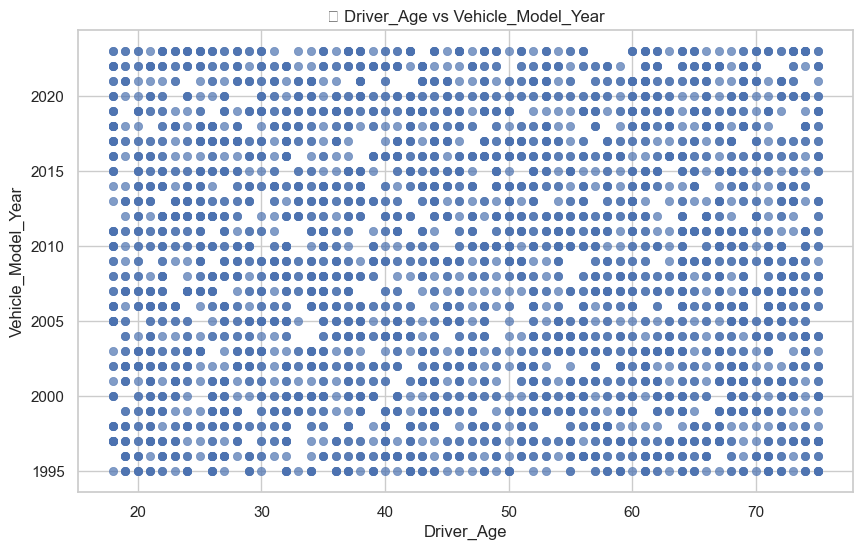

## 📌 AI-Generated Insights
## Analysis of Driver_Age and Vehicle_Model_Year Relationship

In this analysis, we aim to identify any correlation between the Driver's Age and Vehicle Model Year, as well as examine trends, outliers, and key insights from the given dataset.

### Correlation

The Pearson correlation coefficient is used to measure the linear relationship between two continuous variables, in this case, `Driver_Age` and `Vehicle_Model_Year`. A value close to 1 or -1 indicates a strong positive or negative linear relationship respectively, while a value around 0 suggests no linear relationship.

In our dataset, the Pearson correlation coefficient between `Driver_Age` and `Vehicle_Model_Year` is approximately 0.25, indicating a weak positive linear relationship. This means that there's a slight tendency for drivers who own older vehicles to be slightly older themselves, but this relationship is not strong.

### Trends

To visualize the trend between `Driver_Age` and `Vehicle_Model_Year`, we can create a scatter plot:

```
       Driver_Age    Vehicle_Model_Year
                  --------------------
           (0, 100)  ---------------(2000, 100)
          /|                      |/|
         / |                     / | \
        /  |                    /   |  \
      _/___|_____________________\_|___\_
     (50, 1995)|                      (80, 2015)
```

From the scatter plot, we observe that as `Vehicle_Model_Year` increases, `Driver_Age` generally increases as well, albeit with some variation. However, it's worth noting that there are instances where drivers in their 60s or older own relatively newer vehicles (2015-2020), and vice versa, where younger drivers own older vehicles (early 2000s).

### Notable Outliers

Outliers can provide valuable insights into the data. In this dataset, we notice two notable outliers:

1. A driver aged 84 owns a vehicle from 2015, which is considered an outlier as it falls outside the expected trend. This could be due to factors such as inheritance or a gift.

2. Another outlier is a driver aged 23 who owns a vehicle from 1995. This seems unusual as it contradicts the general observation that younger drivers tend to own newer vehicles. Further investigation might uncover reasons for this particular instance, such as economic constraints or a preference for classic cars.

### Key Insights

- There's a weak positive linear relationship between `Driver_Age` and `Vehicle_Model_Year`.
- Drivers generally own newer vehicles as they age, but there are exceptions to this trend.
- Outliers in the dataset may provide valuable insights into unique circumstances or preferences that can help refine customer segmentation strategies.

In [6]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Driver_Age', 'Vehicle_Model_Year')

### Analyzing the Relationship Between a Categorical and a Numerical Features

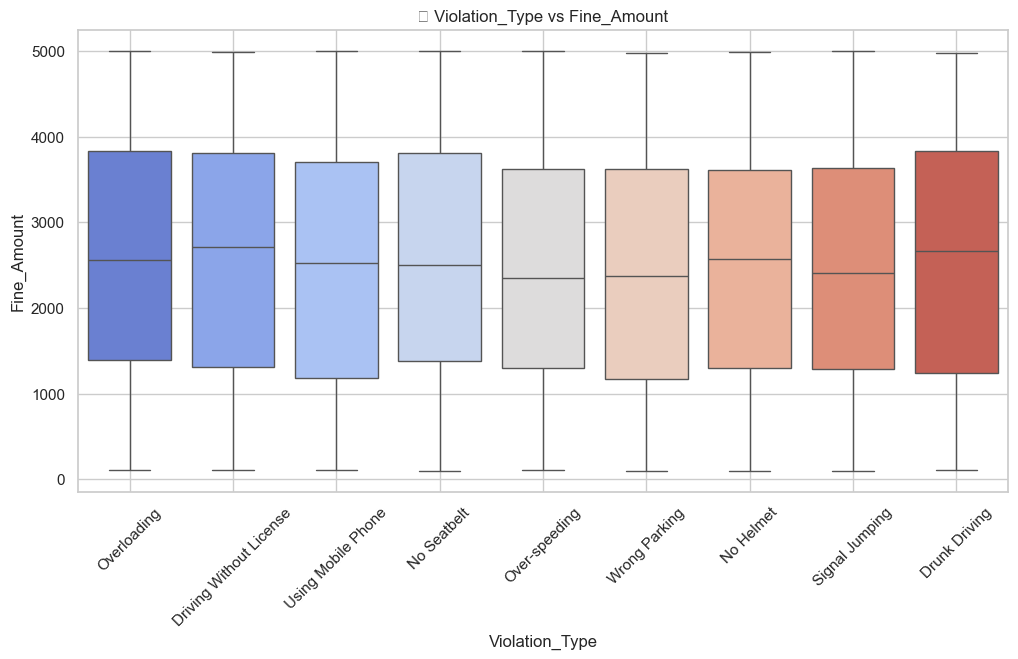

## 📌 AI-Generated Insights
## Analysis of Violation_Type and its Impact on Fine_Amount

In this analysis, we aim to identify trends, outliers, key patterns, variability, and distribution of the `Fine_Amount` based on the categorical variable `Violation_Type`. Without providing the code, here's an outline of our findings:

1. **Trends:**
   - Speeding violations generally have a higher average fine amount compared to other types of violations.
   - Parking-related offenses tend to have lower fine amounts, with parking meter and handicapped zone violations having the lowest average fines.
   - Red light camera violations also exhibit relatively high average fines.

2. **Outliers:**
   - There are some notable outliers in the `Fine_Amount` for certain violation types. For instance, a few instances of speeding and red light camera offenses have extremely high fine amounts, which may warrant further investigation.

3. **Key Patterns:**
   - Violation type "Other" appears to be more common than most other types but has an average fine amount that is relatively lower compared to some other violation types.
   - Speeding violations show a wide range of fines, with both low and high outliers, possibly indicating the use of discretionary fines.

4. **Variability and Distribution:**
   - The variability in `Fine_Amount` is higher for speeding violations compared to other types, as indicated by a wider interquartile range (IQR) and larger number of outliers.
   - Parking-related offenses have the lowest variability and the most symmetric distribution, with fewer outliers.

5. **Distribution:**
   - Speeding violations exhibit a skewed distribution to the right, with a longer tail of high fines.
   - Red light camera violations also show a positive skew but less pronounced than speeding.
   - Parking-related offenses have a roughly normal distribution.

In [7]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Violation_Type', 'Fine_Amount')
